In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as matplotlib
import random
import warnings
import numpy as np
import seaborn as sns
from statistics import mean

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

warnings.filterwarnings('ignore')

# Random Forest Classifiers

Welkom bij de workshop over Random Forest Classifiers. In dit notebook hopen we iets meer te vertellen over wat een Random Forest Classifier is, hoe het werkt en hoe het kan toegepast worden. Daarbij delen we de notebook op in 3 onderdelen:
- Theorie
- Parametrisering.
- Vergelijking RFC met andere classifiers

In de workshop van Huib is al het een en ander aan theorie behandeld. We zullen daarom op al behandelde stof niet al te diep ingaan maar de meeste belangrijk punten herhalen om het geheugen op te frissen. Random Forest Classifier wordt overigens door het notebook heen aangeduid met de afkorting RFC.

We gebruiken een kleine dataset waarmee we een hartziekte kunnen voorspellen. Deze is hier te vinden:
https://www.kaggle.com/ronitf/heart-disease-uci

Als je klaar bent met deze notebook kan je naar NB2 gaan. Daar worden missende waardes behandeld.

## Inladen dataset

In [2]:
heart_df = pd.read_csv('heart.csv')
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Train data wordt gemaakt voor verder gebruik
X = heart_df.drop('target', axis=1)
y = heart_df[['target']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## Theorie

RFC is een machine learning algoritme wat gebruikt wordt om classificatie problemen op te lossen. Dit algoritme valt dus onder supervised machine learning.

Een RFC is een verbetering/uitbreiding op het Decision Tree Classifier (DTC) algoritme. Een DTC wordt gemaakt door een boomstructuur met beslissingen te creeren. Hierbij wordt de structuur zo opgezet, dat elke scheiding per vertakking de grootste scheiding van informatie oplevert. Om tijdens het creeren van de boom steeds de beste scheiding van takken te kiezen wordt een methode (gini of entropie) gebruikt.

Een RFC maakt gebruik van meerdere DTC's. Door verschillende DTC's op te zetten met random gegenereerde datasets uit een dataset kunnen betere resultaten behaald worden dan met 1 DTC. Dit genereren van random datasets heet 'bagging' en is ook naar voren gekomen in de vorige RFC workshop.

Een RFC gaat uiteindelijk de uitkomsten van alle DTC's tellen en bepaalt met een 'majority vote' het meest gekozen resultaat. Deze manier van werken wordt het 'divide and conquer' of 'ensemble' principe genoemd. Door met meerdere bomen te werken kan een beter resultaat behaald worden. Hieronder is een spelletje het effect van dit principe te zien.

##### Spelregels:
Genereer een random getal tussen de 0 en 1.
Als het getal kleiner dan/gelijk aan 0.4 is dan verlies je het geld
Als het getal groter dan 0.4 dan win je het geld.
Speel het spelletje 10000 keer.

##### Situaties:
- 1 keer met 100 euro
- 10 keer met 10 euro
- 100 keer met 1 euro

Met welk spelletje zou je de meeste winkans hebben houdend aan bovenstaande spelregels?

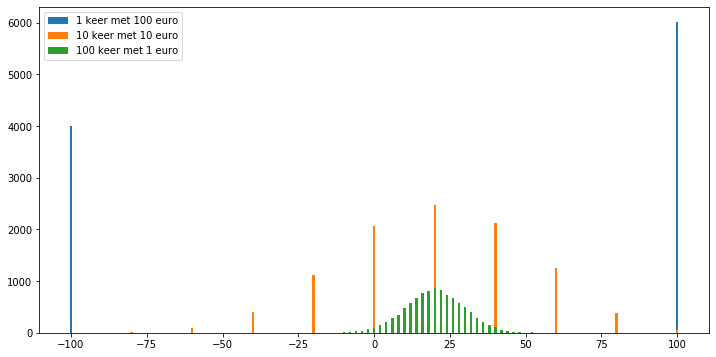

In [4]:
# todo?
def win_money(play, money, repeat) -> [int]:
    total_results = []
    for r in range(repeat):
        game_result = 0
        for p in range(play):
            if random.random() <= 0.4:
                game_result -= money
            else:
                game_result += money
        total_results.append(game_result)
    return total_results

a = pd.Series(win_money(1, 100, 10000)).value_counts()
b = pd.Series(win_money(10, 10, 10000)).value_counts()
c = pd.Series(win_money(100, 1, 10000)).value_counts()

plt.figure(figsize=(12,6))
plt.bar(a.index, a, label='1 keer met 100 euro')
plt.bar(b.index, b, label='10 keer met 10 euro')
plt.bar(c.index, c, label='100 keer met 1 euro')
plt.legend()
plt.show()

Zoals in de bovenstaande grafiek te zien is, is de winkans groter bij het laatste spelletje, 100 keer 1 euro.

### Toepassingen in het bedrijfsleven

RFC wordt in verschillende toepassingen gebruikt in het bedrijfsleven. Hieronder een aantal voorbeelden van hoe een RFC gebruikt kan worden.

1. Om bij banken loyale en frauderende klanten te vinden
2. Om invloed van medicijnen op patienten te voorspellen
3. Analyse en voorspelling van beursgedrag
4. Product- en dienstaanbevelingen
5. En nog veel meer...

## Parametrisering

Om beter inzichtelijk te maken hoe een RFC werkt gaan we kijken naar een aantal parameters. We kijken hierbij vooral naar parameters die gemiddeld het vaakst invloed hebben op het model. Waarbij sommige parameters alleen op specifieke (grootte) datasets invloed hebben. Hieronder een aantal parameters van een RFC bij sklearn met uitleg en een opdracht.

Train de gesplitte train en test data van boven in het notebook steeds per opdracht voor verschillende variabelen en gebruik de accuracy scores voor de opdrachten.

#### Opdracht:

Maak een RFC model en print de parameters die bij het model horen. Dit model kan je verder in het notebook nog gebruiken. 

In [5]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
print(clf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


### n_estimators
Het is de bedoeling dat je een zo simpel mogelijke forest bouwt die nog steeds de hoogste score haalt. Een te complexe forest zal niet snel overfitten (maar uiteindelijk wel, zeker in een te kleine dataset zoals deze), maar zal wel veel onnodige computaties vereisen. Een algemene regel is dat hoe meer estimators je toevoegd, hoe minder de gain wordt, maar hoe meer computaties er vereist zijn. <br>

#### Opdracht:
Laat met een grafiek zien bij hoeveel estimators er geen gain meer is. Test van 1 tot 200.

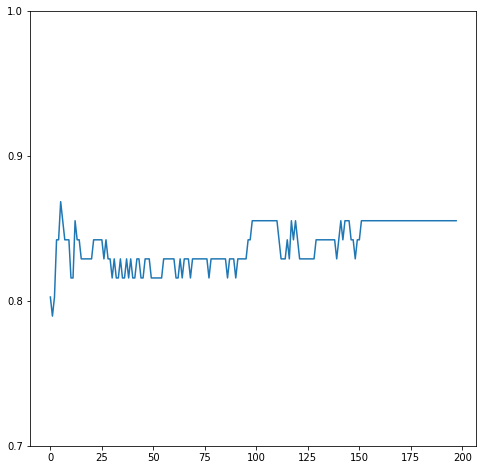

In [6]:
score_list = []
for i in range(2,200,1):
    clf = RandomForestClassifier(max_depth=2, random_state=0,n_estimators=i)
    clf.fit(X_train,y_train)
    score_list.append(clf.score(X_test,y_test))


plt.figure(figsize=(8,8))
plt.plot(score_list)
plt.yticks(np.arange(0.7, 1, step=0.1))
plt.xkcd()

### max_features
De decision tree gaat 'max_features' (integer) aantal features overwegen om als nieuwe split te gebruiken door steeds de entropie of gini te berekenen. Standaard wordt de wortel van het aantal features als 'max_features' genomen. Als het verkleinen van max_features geen significant verschil in naukeurigheid aantoont, kan het verlagen voor performance winst zorgen omdat er minder features als nieuwe split uitgetest hoeven worden.<br>

#### Opdracht
Laat met een grafiek zien wat er gebeurd bij verschillende max_features.

13


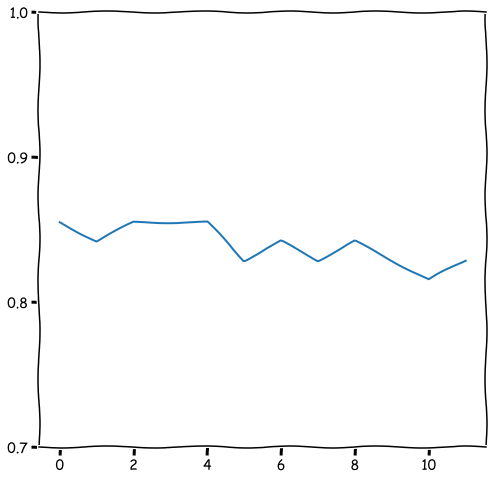

In [7]:
score_list = []
print(clf.n_features_)
for i in range(1,clf.n_features_,1):
    clf = RandomForestClassifier(max_depth=2, random_state=0,max_features=i)
    clf.fit(X_train,y_train)
    score_list.append(clf.score(X_test,y_test))

plt.figure(figsize=(8,8))
plt.plot(score_list)
plt.yticks(np.arange(0.7, 1, step=0.1))
plt.xkcd()

### max_depth
max_depth geeft aan hoe diep de bomen mogen lopen. Te diepe bomen zorgen voor overfitting, terwijl te ondiepe bomen te weinig data encapsuleren en daardoor de accuracy tekort doen.

#### Opdracht:
Laat met een grafiek zien wat er gebeurd bij verschillende max_depth.

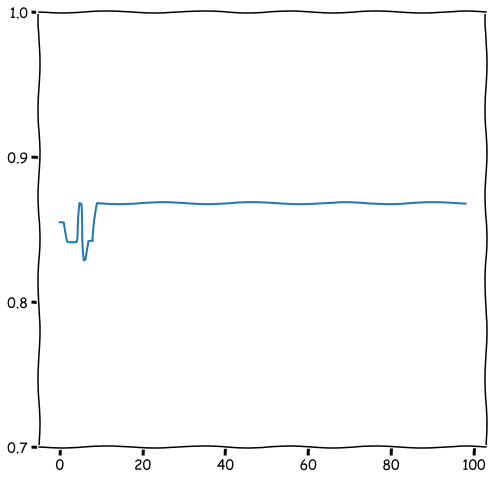

In [8]:
score_list = []

for i in range(1,100,1):
    clf = RandomForestClassifier(random_state=0 ,max_depth=i)
    clf.fit(X_train,y_train)
    score_list.append(clf.score(X_test,y_test))

plt.figure(figsize=(8,8))
plt.plot(score_list)
plt.yticks(np.arange(0.7, 1, step=0.1))
plt.xkcd()

### min_samples_split
min_samples_split vertegenwoordigt het minimum aantal samples dat nodig is om een intern knooppunt te splitsen. Dit kan variëren van het beschouwen van ten minste één monster op elk knooppunt tot het beschouwen van alle monsters op elk knooppunt. Wanneer we deze parameter verhogen, wordt elke boom in het bos meer beperkt, omdat er bij elk knooppunt meer voorbeelden moeten worden overwogen. Als er weinig data is, zoals in de dataset die wij nu gebruiken, is het handig om deze laag te houden aangezien er sowieso weinig samples zijn.

#### Opdracht:
Laat met een grafiek zien wat er gebeurd bij min_samples_split van 1-20.

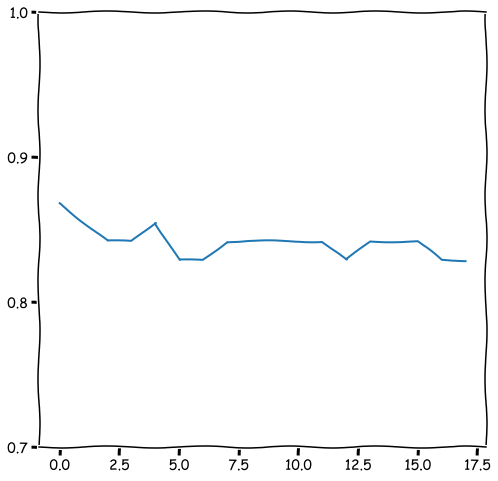

In [9]:
score_list = []
for i in range(2,20,1):
    clf = RandomForestClassifier(random_state=0, min_samples_split=i)
    clf.fit(X_train,y_train)
    score_list.append(clf.score(X_test,y_test))

plt.figure(figsize=(8,8))
plt.plot(score_list,)

plt.yticks(np.arange(0.7, 1, step=0.1))
plt.xkcd()

### min_samples_leaf
min_samples_leaf is het minimum aantal samples dat nodig is om op een leaf node te zijn. Deze parameter is vergelijkbaar met min_samples_splits, maar dit beschrijft het minimale aantal monsters van monsters aan de bladeren. Het uiteinde van de boom.

#### Opdracht:
Laat met een grafiek zien wat er gebeurd bij min_samples_leaf van 1-20.

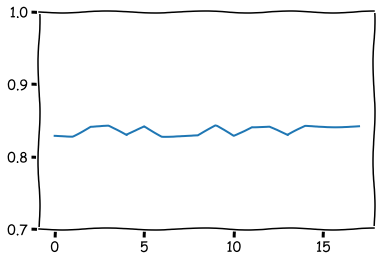

In [10]:
score_list = []
for i in range(2,20,1):
    clf = RandomForestClassifier(random_state=0, min_samples_leaf=i)
    clf.fit(X_train,y_train)
    score_list.append(clf.score(X_test,y_test))

plt.plot(score_list)
plt.yticks(np.arange(0.7, 1, step=0.1))
plt.xkcd()

### criterion:
In de workshop van Huib hebben we al gezien wat het verschil is tussen de gini index en entropie. De gini index en entropie zijn beide wiskundige functies om de beste split in informatie te bepalen.

Gini:
- 1 - $\sum_{j=1}^{c} P{j}^{2}$

Entropie:
- \- $\sum_{j=1}^{c} P{j}^{log p{j}}$

https://stackoverflow.com/questions/46480457/difference-between-min-samples-split-and-min-samples-leaf-in-sklearn-decisiontre

Beide functies hebben over het algemeen geen significant verschil in resultaat. Het grootste verschil tussen gini en entropie is de runtime. Entropie bevat in tegenstelling tot gini een logaritmische functie waardoor runtimes hoger liggen. Daarom heeft sklearn gini als standaard staan.

#### Opdracht:

Vergelijk de score van het model voor parameter criterion 'gini' en 'entropy'. Als je random_state voor het model niet op 0 zet, neem dan het gemiddelde van verschillende tests. Wat is het verschil in accuracy? Geef ook aan hoe lang elke soort er over doet.

In [11]:
# score_list = []
def compare(criterion):
    clf = RandomForestClassifier(random_state=0, criterion=criterion)
    models = [clf.fit(X_train,y_train) for i in range(20)]
    score_list = [model.score(X_test,y_test) for model in models]
    return mean(score_list)

print("Gini has a average score of {} \nEntropie has a average score of {}".format(compare("gini"),compare("entropy")))



Gini has a average score of 0.868421052631579 
Entropie has a average score of 0.8421052631578947


### Grid Search:

Een van de manieren om snel de beste parameters voor jouw model te vinden is door gebruik te maken van een grid search. Deze functie gaat alle mogelijk modellen af met de verschillende parameters die opgegeven zijn. Vervolgens kan met een aantal functies een aantal dingen opgevraagd worden zoals de beste parameters of de score voor de beste parameters. Voor alle parameters kan je naar de website van sklearn gaan:
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

#### Opdracht:
- instantiëer een RFC model
- maak een dict met parameters die je wilt testen met verschillende waardes per parameter in een lijst als value.
- instantiëer een GridSearchCV model en fit deze op de traindata
- vraag beste parameters op voor combinatie met hoogste score

In [19]:
# todo
optimal_forrest = RandomForestClassifier(random_state=0)
par = {'criterion': ['gini','Entropie'], 'max_depth': [2,4,6,10,20], 'min_samples_leaf': [1,5,10,20], 'min_samples_split': [1,5,10,20], 'max_depth': [1,5,10,20], 'n_estimators': [10,20,50,100]}
clf = GridSearchCV(forrest, par)
clf.fit(X_train,y_train)
print("best parameters are {}".format(clf.best_params_))
print("with a score of {}".format(clf.best_score_))
standard_forrest = RandomForestClassifier(random_state=0)
standard_forrest.fit(X_train,y_train)
print("While a standard forrest preforms at {}".format(standard_forrest.score(X_test,y_test)))

best parameters are {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
with a score of 0.8506280193236716
While a standard forrest preforms at 0.868421052631579


Het kan zijn dat je bij weinig succes had bij het veranderen van de parameters en dat de standaard parameters in de meeste gevallen het best werkte. Dit heeft onder andere te maken met de grootte van de dataset. Daarnaast hebben we niks gedaan aan coorelatie onderzoek of kolomselectie. De dataset is niet aangepast. Als je nog tijd over hebt kan je kijken of het verbeteren van het dataframe andere resultaten oplevert.

## Vergelijking RFC en Decision Tree Classifier

#### Opdracht:

Om te zien of een RFC ook voor de gebruikte dataset een beter model biedt dan een DTC kunnen we de scores vergelijken. Het vergelijken van scores kan heel simpel zonder parameters te gebruiken of door eerst te zoeken naar de beste hyperparameters voor beide modellen.

Maak een RFC en DTC model en fit de traindata. Vergelijk de scores van beide modellen. (je kan ervoor kiezen om verschillende hyperparameters te testen maar dit hoeft niet) Gebruik wel random_state=0.

In [21]:
forrest = RandomForestClassifier(random_state=0)
tree = DecisionTreeClassifier(random_state=0)

forrest.fit(X_train,y_train)
tree.fit(X_train,y_train)

print("a standard forrest preforms at {} while a standard tree preforms at {}".format(forrest.score(X_test,y_test),tree.score(X_test,y_test)))

a standard forrest preforms at 0.868421052631579 while a standard tree preforms at 0.7894736842105263


Met de testen die wij hebben uitgevoerd kwamen we op een iets hogere score uit bij een RFC. Dit is ook te verwachten aangezien een RFC in feite een verbetering is op een DTC. Het ligt wel aan de dataset waarop je wilt trainen. Bij kleinere datasets is het verstandiger om een RFC te gebruiken zoals de dataset die we in dit notebook gebruiken. Dit heeft weer te maken met het 'ensemble' principe. Hoe meer mensen naar hetzelfde (of een deel van het) probleem kijken, hoe beter de uitkomst.

Bij grotere datasets is het verstandiger om een DTC te gebruiken (mits het verschil in score niet noemenswaardig is) Dit heeft te maken met een van de nadelen van een RFC. Een RFC is namelijk een van de traagste machine learning algoritmes. Een DTC is ook niet het meeste snelle algoritme alleen wel sneller dan een RFC.

### Bronnen:
https://datascience.stackexchange.com/questions/10228/when-should-i-use-gini-impurity-as-opposed-to-information-gain
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=randomforest#sklearn.ensemble.RandomForestClassifier
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
https://medium.com/all-things-ai/in-depth-parameter-tuning-for-random-forest-d67bb7e920d
https://www.youtube.com/watch?v=sQ870aTKqiM